<div>
<img src=https://www.institutedata.com/wp-content/uploads/2019/10/iod_h_tp_primary_c.svg width="300">
</div>

# Lab 7.1.2: Random Forests

INSTRUCTIONS:

- Read the guides and hints, then create the necessary analysis and code for the scenario below.
- The baseline results (minimum) are:
    - **Accuracy** = 0.7419
    - **ROC AUC**  = 0.6150
- Try to achieve better results!

# Foreword
It is common that companies and professionals start with the data immediately available. Although this approach works, ideally the first step is to identify the problem or question and only then identify and obtain the set of data that can help to solve or answer the problem.

Also, given the current abundance of data, processing power and some particular machine learning methods, there could be a temptation to use ALL the data available. **Quality** is _**better**_ then **Quantity**!

Part of calling this discipline **Data Science** is that it is supposed to follow a process and not reach conclusions without support from evidence.

Moreover, it is a creative, exploratory and interactive processes. It is part of the process to repeat, review and change when finding a dead-end.

# Step 1: Define the problem or question
Identify the subject matter and the given or obvious questions that would be relevant in the field.

Dataset on blood transfusions


## Potential Questions
List the given or obvious questions.
Has the person donated blood in March 2007?
will a first time donor donate blood again?
is a donor likely to make another donation after a long period of no donations


## Actual Question
Choose the **one** question that should be answered.
Has the person donated blood in March 2007?

# Step 2: Find the Data
### Blood Transfusion Service Center DataSet
- **Abstract**: Data taken from the **Blood Transfusion Service Center** in Hsin-Chu City in Taiwan.
- Date Donated: 2008-10-03
- Source:
        Original Owner and Donor: Prof. I-Cheng Yeh 
        Department of Information Management 
        Chung-Hua University, 
        Hsin Chu, Taiwan 30067, R.O.C. 

- Citation Request:
    **NOTE**: Reuse of this database is unlimited with retention of copyright notice for Prof. I-Cheng Yeh and the following published paper: 

        Yeh, I-Cheng, Yang, King-Jang, and Ting, Tao-Ming, "Knowledge discovery on RFM model using Bernoulli sequence, "Expert Systems with Applications, 2008
        
### UCI - Machine Learning Repository
- Center for Machine Learning and Intelligent Systems

The [**UCI Machine Learning Repository**](http://archive.ics.uci.edu/ml/about.html) is a collection of databases, domain theories, and data generators that are used by the machine learning community for the empirical analysis of machine learning algorithms.

Dataset downloaded as transfusion.data

# Step 3: Read the Data
- Read the data
- Perform some basic structural cleaning to facilitate the work

In [19]:
# Import libraries

import itertools
import numpy as np
import pandas as pd
import seaborn as sns

%matplotlib inline
import matplotlib.pyplot as plt
import matplotlib.gridspec as gridspec

from sklearn import datasets

In [20]:
# Read data in pandas

## Loading the dataset
bt = pd.read_csv("transfusion.data")


# Check data has loaded correctly
bt.head()

,Recency (months),Frequency (times),Monetary (c.c. blood),Time (months),whether he/she donated blood in March 2007
0,2,50,12500,98,1
1,0,13,3250,28,1
2,1,16,4000,35,1
3,2,20,5000,45,1
4,1,24,6000,77,0


# Step 4: Explore and Clean the Data
- Perform some initial simple **EDA** (Exploratory Data Analysis)
- Check for
    - **Number of features**
    - **Data types**
    - **Domains, Intervals**
    - **Outliers** (are they valid or spurious data [read or measure errors])
    - **Null** (values not present or coded [as zero of empty strings])
    - **Missing Values** (coded [as zero of empty strings] or values not present)
    - **Coded content** (classes identified by numbers or codes to represent the absence of data)

In [21]:
bt.shape

(748, 5)

In [22]:
bt.describe

<bound method NDFrame.describe of      Recency (months)  Frequency (times)  Monetary (c.c. blood)  \
0                   2                 50                  12500   
1                   0                 13                   3250   
2                   1                 16                   4000   
3                   2                 20                   5000   
4                   1                 24                   6000   
..                ...                ...                    ...   
743                23                  2                    500   
744                21                  2                    500   
745                23                  3                    750   
746                39                  1                    250   
747                72                  1                    250   

     Time (months)  whether he/she donated blood in March 2007  
0               98                                           1  
1               28             

In [23]:
bt.dtypes

Recency (months)                              int64
Frequency (times)                             int64
Monetary (c.c. blood)                         int64
Time (months)                                 int64
whether he/she donated blood in March 2007    int64
dtype: object

dtypes are all int64 which is good, no changes necessary

In [24]:
bt.columns

Index(['Recency (months)', 'Frequency (times)', 'Monetary (c.c. blood)',
       'Time (months)', 'whether he/she donated blood in March 2007'],
      dtype='object')

In [25]:
#check for any null values
bt.isnull().sum()

Recency (months)                              0
Frequency (times)                             0
Monetary (c.c. blood)                         0
Time (months)                                 0
whether he/she donated blood in March 2007    0
dtype: int64

In [26]:
#check for any nA'S
bt.isna()

,Recency (months),Frequency (times),Monetary (c.c. blood),Time (months),whether he/she donated blood in March 2007
0,False,False,False,False,False
1,False,False,False,False,False
2,False,False,False,False,False
3,False,False,False,False,False
4,False,False,False,False,False
...,...,...,...,...,...
743,False,False,False,False,False
744,False,False,False,False,False
745,False,False,False,False,False
746,False,False,False,False,False


In [27]:
#Change column names 
bt=bt.rename(columns= {'Recency (months)' : 'Recency' , 'Frequency (times)' : 'Frequency' , 'Monetary (c.c. blood)' : 'Monetary', 'Time (months)' : 'Months' , 'whether he/she donated blood in March 2007' : 'Donated_Mar07'})

In [28]:
bt.head(2)

,Recency,Frequency,Monetary,Months,Donated_Mar07
0,2,50,12500,98,1
1,0,13,3250,28,1


In [29]:
bt['Donated_Mar07'].value_counts(dropna=False)

0    570
1    178
Name: Donated_Mar07, dtype: int64

In [30]:
bt['Recency'].value_counts(dropna=False)

2     173
4     156
11     84
14     76
16     63
23     50
21     44
9      20
3      13
1       9
7       8
5       6
8       6
12      6
6       5
13      5
0       5
10      3
38      2
18      2
15      2
22      1
26      1
35      1
40      1
74      1
20      1
17      1
25      1
39      1
72      1
Name: Recency, dtype: int64

In [31]:
bt['Frequency'].value_counts(dropna=False)

1     158
2     112
3      87
4      62
5      62
6      52
7      43
8      31
9      24
11     22
12     14
10     14
14     13
16     13
13      9
15      6
17      4
24      3
21      2
19      2
20      2
22      2
34      1
41      1
26      1
44      1
50      1
43      1
38      1
18      1
23      1
46      1
33      1
Name: Frequency, dtype: int64

In [32]:
bt['Months'].value_counts(dropna=False)

4     57
16    51
14    44
23    36
2     36
      ..
12     1
55     1
3      1
13     1
54     1
Name: Months, Length: 78, dtype: int64

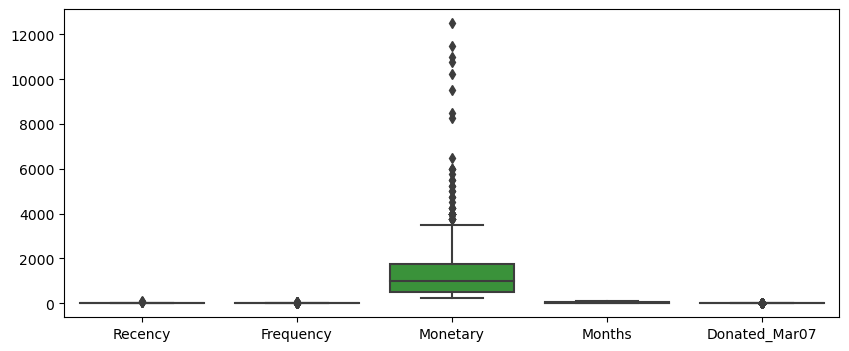

In [33]:
#do a boxplot to show outliers
plt.figure(figsize = (10, 4))
sns.boxplot(data = bt, width = 0.8)
plt.show()

In [34]:
bt['Monetary (c.c. blood)'].value_counts()

KeyError: 'Monetary (c.c. blood)'

In [ ]:
#template to use to show detail of the data


# Number of features
print('- Number of features: %d' % bt.shape[1])
for c in bt.columns:
    print('  - %s' % c)

# Data types
print('\n- Data types')
print(bt.dtypes)

# Domains, Intervals
print('\n- Domains, Intervals')
for c in bt.columns:
    x = bt[c].unique()
    x.sort()
    print('  - %-16s: min: %d, max: %d' % (c, bt[c].min(), bt[c].max()))
    print('    values: %s' % x)

print('\n- Nulls')
for c in bt.columns:
    print('  - %-16s: Nulls: %d' % (c, bt[c].isna().sum()))



In [ ]:
#do a boxplot to show outliers
plt.figure(figsize = (5, 3))
sns.boxplot(data = bt['Recency'], width = 0.8)
plt.show()

In [ ]:
#do a boxplot to show outliers
plt.figure(figsize = (5, 3))
sns.boxplot(data = bt['Frequency'], width = 0.8)
plt.show()

In [ ]:
#template to use to show outliers - need to find how to turn the boxplot horizontally. Vert=false doesn't work

# Check for Outliers
for c in bt.columns:
    fig, ax = plt.subplots(2, 
                           figsize = (10, 5),
                           sharex = True, 
                           gridspec_kw = {'height_ratios': (0.15, 0.85)})

    ax_box = ax[0]
    ax_box = sns.boxplot(bt[c], ax = ax_box)
    ax_box.set(title = c, yticks = [], xlabel = '')
    sns.despine(ax = ax_box, left = True)
    
    ax_hist = ax[1]
    
    if c == 'Donated_Mar_2007':       
        ax_hist = sns.distplot(bt[c], kde=False, ax = ax_hist)
        ax_hist.set(xlabel = '')
        sns.despine(ax = ax_hist)
    else:
        ax_hist = sns.distplot(bt[c], ax = ax_hist)
        ax_hist.set(xlabel = '')
        sns.despine(ax = ax_hist)
        

plt.show()


No outliers in time feature, however there are large outliers in the others

In [ ]:
bt.corr()

In [ ]:
bt['Donated_Mar07'].value_counts(dropna='False')

In [ ]:
bt['Months'].value_counts(dropna='False')

In [ ]:
colormap = plt.cm.RdBu
plt.figure(figsize = (10, 5))
plt.title('Pearson Correlation of Features', size = 5)
sns.heatmap(bt.astype(float).corr(),
            linewidths = 0.1,
            vmax = 1.0,
            square = True,
            cmap = colormap,
            linecolor = 'white',
            annot = True)
plt.show()

frequency and monetary are highly correlated - remove one

In [ ]:
# create X and y to match Scikit-Learn parlance

features = ['Recency', 'Frequency', 'Monetary', 'Months']
outcome = 'Donated_Mar07'

# X include all the features
X = bt[features].copy()
# y is the target variable
# Note: As it is a classification problem, 0 and 1 are converted to '0' and '1' (int to str)
y = bt[outcome].astype(str).copy()

In [ ]:
## Check the data

# About X
print('X is a %s' % type(X))
print('X has %d rows and %d columns' % X.shape)
print('Basic Statistics about X%s' % ('_'*50))
print(bt.describe())
print('')
print('Sample of X%s' % ('_'*50))
print(X.head())

In [35]:
# About y
print('y is a %s' % type(y))
print('y has %d rows' % y.shape)
print('')
print('Sample of y%s' % ('_'*50))
print(y[:5])

NameError: name 'y' is not defined

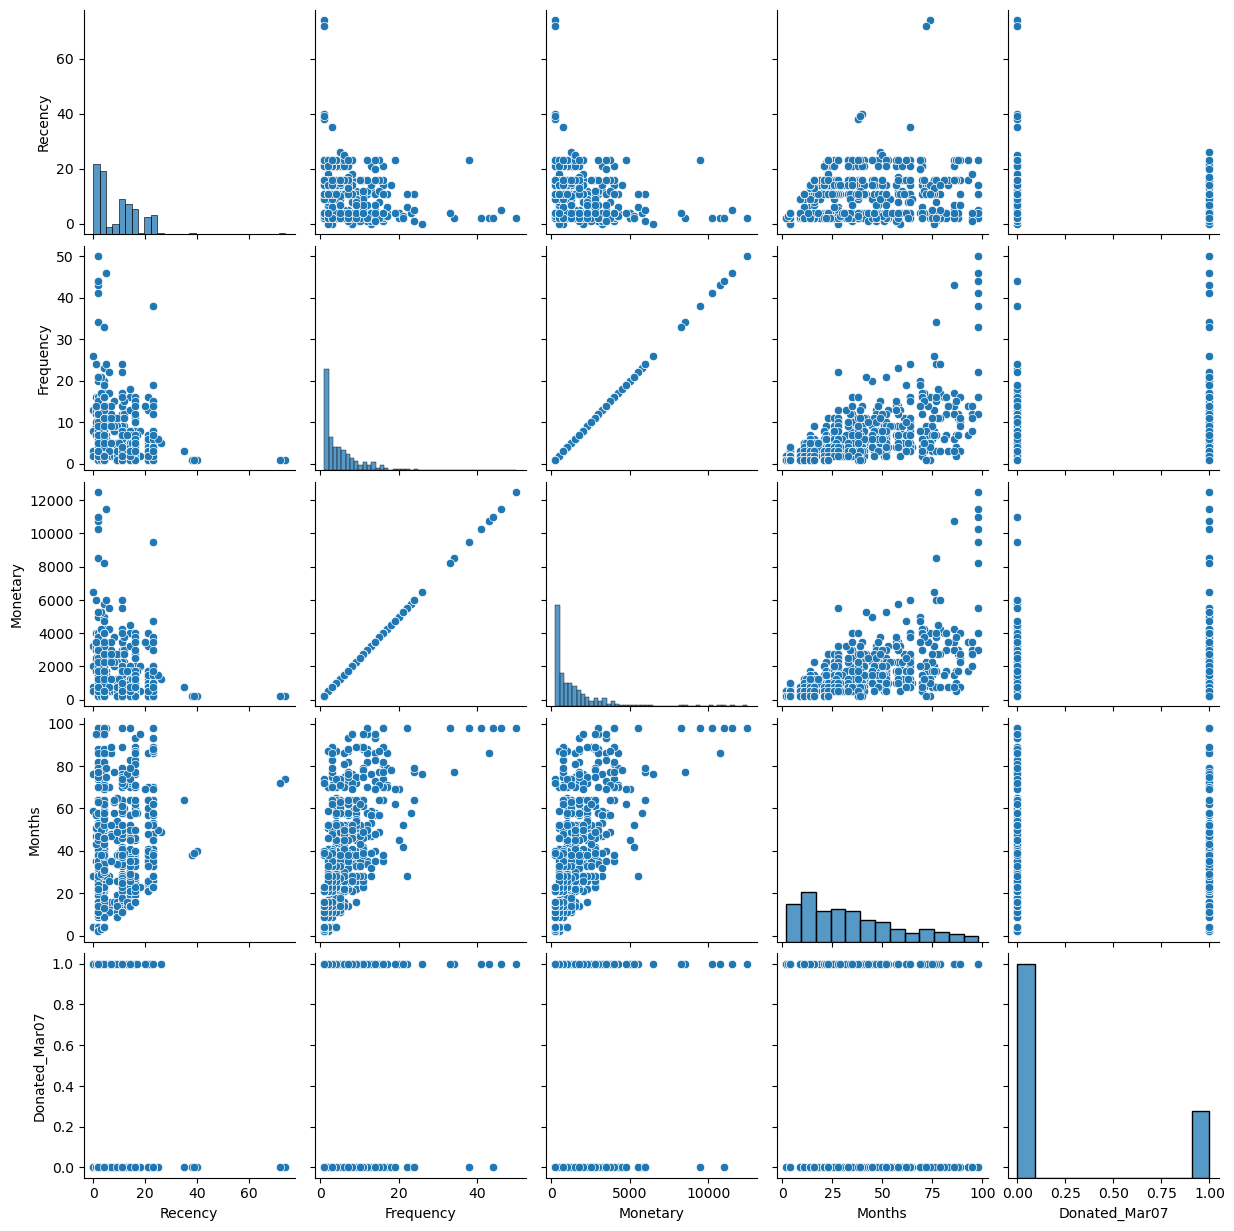

In [36]:
#pairplot of the data


sns.pairplot(bt)
plt.show()

pairplot not useful for Donated_Mar07 feature as only 1 or 0.
can see correlations with recency and frequency, months and all other features

# Step 5: Prepare the Data
- Deal with the data as required by the modelling technique
    - **Outliers** (remove or adjust if possible or necessary)
    - **Null** (remove or interpolate if possible or necessary)
    - **Missing Values** (remove or interpolate if possible or necessary)
    - **Coded content** (transform if possible or necessary [str to number or vice-versa])
    - **Normalisation** (if possible or necessary)
    - **Feature Engineer** (if useful or necessary)

No need to transfer strings to number etc as dtypes are all ok as is

majority of preparation done in Step 4

consult stakeholders on outlier removal

In [37]:
bt.head(2)

,Recency,Frequency,Monetary,Months,Donated_Mar07
0,2,50,12500,98,1
1,0,13,3250,28,1


# Step 6: Modelling
Refer to the Problem and Main Question.
- What are the input variables (features)?
- Is there an output variable (label)?
- If there is an output variable:
    - What is it?
    - What is its type?
- What type of Modelling is it?
    - [ ] Supervised
    - [ ] Unsupervised 
- What type of Modelling is it?
    - [ ] Regression
    - [ ] Classification (binary) 
    - [ ] Classification (multi-class)
    - [ ] Clustering

In [38]:
#template to use when displaying model selection

print('- What are the input variables (features)?')
print('  - %s' % ', '.join(features))
print('- Is there an output variable (label)?')
print('  - %s' % ('Yes' if outcome else 'No'))
print('- If there is an output variable:')
print('    - Which one is it?')
print('      - %s' % outcome)
print('    - What is its type?')
print('      - %s' % y.dtypes)
print('  - What type of Modelling is it?')
print('    - [%s] Supervised' % ('x' if outcome else ' '))
print('    - [%s] Unsupervised' % (' ' if outcome else 'x'))
print('  - What type of Modelling is it?')
print('    - [%s] Regression' % ('x' if y.dtypes != 'object' else ' '))
print('    - [%s] Classification (binary)' % ('x' if (y.dtypes == 'object') and (len(y.unique()) == 2) else ' '))
print('    - [%s] Classification (multi-class)' % ('x' if (y.dtypes == 'object') and (len(y.unique()) != 2) else ' '))
print('    - [%s] Clustering' % (' ' if outcome else 'x'))

- What are the input variables (features)?


NameError: name 'features' is not defined

# Step 7: Split the Data

Need to check for **Supervised** modelling:
- Number of known cases or observations
- Define the split in Training/Test or Training/Validation/Test and their proportions
- Check for unbalanced classes and how to keep or avoid it when splitting

this is a supervised model

In [ ]:
from sklearn.model_selection import train_test_split

In [ ]:
## Create training and testing subsets
test_size = X.shape[0] - 500

X_train, X_test, y_train, y_test = train_test_split(X, y, 
                                                    test_size = test_size,
                                                    random_state = 100666001,
                                                    stratify = y)

# Step 8: Define a Model

Define the model and its hyper-parameters.

Consider the parameters and hyper-parameters of each model at each (re)run and after checking the efficiency of a model against the training and test datasets.

In [ ]:
#using randomforest in this lab
from sklearn.ensemble import RandomForestClassifier
rfmodel = RandomForestClassifier(random_state=1)
print(rfmodel)



# Step 9: Fit the Model

In [ ]:
# Fit model
rfmodel.fit(X_train, y_train)

# Step 10: Verify and Evaluate the Training Model
- Use the **training** data to make predictions
- Check for overfitting
- What metrics are appropriate for the modelling approach used
- For **Supervised** models:
    - Check the **Training Results** with the **Training Predictions** during development
- Analyse, modify the parameters and hyper-parameters and repeat (within reason) until the model does not improve

In [ ]:
from sklearn.metrics import accuracy_score
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score
from sklearn.metrics import roc_auc_score
from sklearn.metrics import confusion_matrix
from sklearn.metrics import precision_recall_curve
from sklearn.metrics import roc_curve
from sklearn.metrics import auc

In [ ]:
# Evaluate model against training set
#good template to use when showing scores, confusion matrix and ROC 

def show_summary_report(actual, prediction):

    if isinstance(actual, pd.Series):
        actual = actual.values.astype(int)
    prediction = prediction.astype(float)
    prediction_int = np.round(prediction)

    print('Accuracy : %.4f [TP / N]         Best: 1, Worst: 0' %
          accuracy_score(actual, prediction_int))
    msg = '           Proportion of predicted labels that match the true labels.'
    print(msg)
    print('Precision: %.4f [TP / (TP + FP)] Best: 1, Worst: 0' %
          precision_score(actual, prediction_int))
    msg = '           Not to label a negative sample as positive.'
    print(msg)
    print('Recall   : %.4f [TP / (TP + FN)] Best: 1, Worst: 0' %
          recall_score(actual, prediction_int))
    msg = '           Find all the positive samples.'
    print(msg)
    print('ROC AUC  : %.4f                  Best: 1, Worst: < 0.5' %
          roc_auc_score(actual, prediction))
    print('-' * 80)
    print('TP: True Positives, FP: False Positives,')
    print('TN: True Negatives, FN: False Negatives,')
    print('N: Number of samples')

    # Confusion Matrix
    mat = confusion_matrix(actual, prediction_int)

    # Precision/Recall
    precision, recall, _ = precision_recall_curve(actual, prediction)

    # Compute ROC curve and ROC area
    fpr, tpr, _ = roc_curve(actual, prediction)
    roc_auc = auc(fpr, tpr)

    # plot
    fig, ax = plt.subplots(1, 3, figsize=(18, 6))
    fig.subplots_adjust(left=0.02, right=0.98, wspace=0.2)

    # Confusion Matrix
    sns.heatmap(mat.T, square=True, annot=True, fmt='d',
                cbar=False, cmap='Blues', ax=ax[0])

    ax[0].set_title('Confusion Matrix')
    ax[0].set_xlabel('True label')
    ax[0].set_ylabel('Predicted label')

    # Precision/Recall
    step_kwargs = {'step': 'post'}
    ax[1].step(recall, precision, color='b', alpha=0.2, where='post')
    ax[1].fill_between(recall, precision, alpha=0.2, color='b', **step_kwargs)
    ax[1].set_ylim([0.0, 1.0])
    ax[1].set_xlim([0.0, 1.0])
    ax[1].set_xlabel('Recall')
    ax[1].set_ylabel('Precision')
    ax[1].set_title('2-class Precision-Recall curve')

    # ROC
    ax[2].plot(fpr, tpr, color='darkorange', lw=2,
               label='ROC curve (AUC = %0.2f)' % roc_auc)
    ax[2].plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
    ax[2].set_xlim([0.0, 1.0])
    ax[2].set_ylim([0.0, 1.0])
    ax[2].set_xlabel('False Positive Rate')
    ax[2].set_ylabel('True Positive Rate')
    ax[2].set_title('Receiver Operating Characteristic')
    ax[2].legend(loc='lower right')

    plt.show()






In [ ]:
y_train_prob = rfmodel.predict_proba(X_train)[:,1]

In [ ]:
show_summary_report(y_train, y_train_prob)

# Step 11: Make Predictions and Evaluate the Test Model
**NOTE**: **Do this only after not making any more improvements in the model**.

- Use the **test** data to make predictions
- For **Supervised** models:
    - Check the **Test Results** with the **Test Predictions**

In [ ]:
# Evaluate model against test set

In [ ]:
y_test_prob = rfmodel.predict_proba(X_test)[:,1]

In [ ]:
show_summary_report(y_test, y_test_prob)

# Step 12: Solve the Problem or Answer the Question
The results of an analysis or modelling can be used:
- As part of a product or process, so the model can make predictions when new input data is available
- As part of a report including text and charts to help understand the problem
- As input for further questions

>

>

>

this model is able to predict if a person makes a donation in March 2007 or not



---



---



> > > > > > > > > © 2023 Institute of Data


---



---



